In [2]:
from selenium import webdriver
driver = webdriver.Chrome('c:\chrome\chromedriver.exe')
url = "http://search.danawa.com/dsearch.php?query=무선청소기&tab=main"
driver.get(url)

In [6]:
from bs4 import BeautifulSoup

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

prod_items = soup.select('li.prod_item')
len(prod_items)

42

In [8]:
prod_items = soup.select('div.main_prodlist > ul.product_list > li.prod_item')
len(prod_items)

41

In [10]:
# 상품명 가져오기
title = prod_items[0].select('p.prod_name > a')[0].text.strip()
print(title)

LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571


In [12]:
spec_list = prod_items[0].select('div.spec_list')[0].text.strip()
print(spec_list)

핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 2중터보싸이클론 / 스마트인버터모터 / 흡입력: 210W / 소비전력: 590W / [배터리] 분리형 / 리튬이온 (2개) / 충전시간: 4시간 / 사용시간: 2시간 / [필터] 헤파필터 / 5단계여과 / [기능] 자동물공급 / 배터리잔량표시 / WiFi / [구성품] 바닥 / 물걸레 / 침구 / 솔형 / 틈새 / 거치대 / [부가] 알레르기인증(BAF) / 미세먼지인증(SLG) / 색상: 카밍베이지 / 크기(가로x세로x깊이): 250x1120x260mm


In [14]:
price = prod_items[0].select('li.rank_one > p.price_sect > a > strong')[0].text.strip().replace(",","")
print(price)

1403950


In [16]:
prod_data = []

for prod_item in prod_items:
    try: # ① 상품명 가져오기
        title = prod_item.select('p.prod_name > a')[0].text.strip()
    except:
        title = ''
    try: # ② 스펙 목록 가져오기
        spec_list = prod_item.select('div.spec_list')[0].text.strip()
    except:
        spec_list = ''
    try: # ③ 가격 정보 가져오기 
        price = prod_item.select('li.rank_one > p.price_sect > a > strong')[0].text.strip().replace(",","")
    except:
        price = 0
    prod_data.append([title, spec_list, price])
    
print(len(prod_data))
print(prod_data)

41
[['LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571', '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 2중터보싸이클론 / 스마트인버터모터 / 흡입력: 210W / 소비전력: 590W / [배터리] 분리형 / 리튬이온 (2개) / 충전시간: 4시간 / 사용시간: 2시간 / [필터] 헤파필터 / 5단계여과 / [기능] 자동물공급 / 배터리잔량표시 / WiFi / [구성품] 바닥 / 물걸레 / 침구 / 솔형 / 틈새 / 거치대 / [부가] 알레르기인증(BAF) / 미세먼지인증(SLG) / 색상: 카밍베이지 / 크기(가로x세로x깊이): 250x1120x260mm', '1403950'], ['lDLNJ1qyQh', 'lDLNJ1qyQh87164', '87164'], ['샤오미 미지아 차량용 핸디 무선 청소기 (해외구매)', '차량용청소기 / 무선 / 흡입력: 13,000Pa / 최대출력: 120W / 헤파필터 / 추가노즐: 틈새, 솔브러쉬 / 사용시간: 9~30분 / 버튼 잠금 장치 / 2단 세기 조절 / 크기: 55x267mm / 무게: 500g', '33580'], ['LG전자 코드제로 ThinQ A9S A9700', '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 2중터보싸이클론 / 인버터모터 / 흡입력: 200W / 소비전력: 590W / [배터리] 분리형 / 리튬이온 (2개) / 충전시간: 4시간 / 사용시간: 2시간 / [필터] 헤파필터 / H13급 / 5단계여과 / [기능] 자동물공급 / 디스플레이표시창 / 배터리잔량표시 / WiFi / [구성품] 바닥 / 물걸레 / 침구 / 솔형 / 굳은먼지 / 상부청소 / 틈새 / 긴틈새 / 매트리스 / 연장툴 / 거치대 / [부가] 미세먼지인증(SLG) / 색상: 판타지실버 / 크기(가로x세로x깊이): 250x1120x260mm', '946150'], ['샤오미 CLEANFLY 차량용 무선 청소기 3세대 (해외구매)', '차량용청소기 / 무선 

In [17]:
def get_prod_items(prod_items):
    prod_data = []
    
    for prod_item in prod_items:
        # ① 상품명 가져오기
        try:
            title = prod_item.select('p.prod_name > a')[0].text.strip()
        except:
            title = ''
        # ② 스펙 목록 가져오기
        try: 
            spec_list = prod_item.select('div.spec_list')[0].text.strip()
        except:
            spec_list = ''
        # ③ 가격 정보 가져오기 
        try: 
            price = int(prod_item.select('li.rank_one > p.price_sect > a > strong')[0].text.strip().replace(",",""))
        except:
            price = 0
        prod_data.append([title, spec_list, price])
        
    return prod_data

prod_items = soup.select('div.main_prodlist > ul.product_list > li.prod_item')
prod_data = get_prod_items(prod_items)
print(len(prod_data))

41


In [18]:
def get_search_page_url(keyword, page):
    return 'http://search.danawa.com/dsearch.php?query={}&volumeType=allvs&page={}&limit=30&sort=saveDESC&list=list&boost=true&addDelivery=N&tab=goods&tab=goods'.format(keyword, page)

keyword = '무선청소기'
page = 1
url = get_search_page_url(keyword, page)
print(url)

http://search.danawa.com/dsearch.php?query=무선청소기&volumeType=allvs&page=1&limit=30&sort=saveDESC&list=list&boost=true&addDelivery=N&tab=goods&tab=goods


In [19]:
!pip install tqdm

In [21]:
import time
from tqdm import tqdm_notebook

total_page = 10
for page in tqdm_notebook(range(1, total_page + 1)):
    time.sleep(5)

<ipython-input-21-af6f865598de>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for page in tqdm_notebook(range(1, total_page + 1)):


In [22]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook

driver = webdriver.Chrome('c:\chrome\chromedriver.exe')
driver.implicitly_wait(3)

keyword = '무선청소기'
total_page = 10
prod_data_total = []

for page in tqdm_notebook(range(1, total_page + 1)):
    url = get_search_page_url(keyword, page)
    driver.get(url)
    time.sleep(5)
    
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    prod_items = soup.select('div#productListArea > div.main_prodlist > ul.product_list > li.prod_item')
    prod_item_list = get_prod_items(prod_items)
    
    prod_data_total = prod_data_total + prod_item_list

<ipython-input-22-3f402f301f43>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for page in tqdm_notebook(range(1, total_page + 1)):


In [23]:
import pandas as pd
data = pd.DataFrame(prod_data_total)
data.columns = ['상품명', '스펙 목록', '가격']
data.to_excel('./files/danawa_crawling_result.xlsx', index = False)

In [35]:
import pandas as pd
data = pd.read_excel('./files/danawa_crawling_result.xlsx')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품명     396 non-null    object
 1   스펙 목록   396 non-null    object
 2   가격      396 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 9.4+ KB


,상품명,스펙 목록,가격
0,LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 2중터보싸...,1403950
1,샤오미 미지아 차량용 핸디 무선 청소기 (해외구매),"차량용청소기 / 무선 / 흡입력: 13,000Pa / 최대출력: 120W / 헤파필...",33580
2,LG전자 코드제로 ThinQ A9S A9700,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 2중터보싸...,946150
3,샤오미 CLEANFLY 차량용 무선 청소기 3세대 (해외구매),"차량용청소기 / 무선 / 흡입력: 16,800Pa / 최대출력: 120W / 헤파필...",49900
4,LG전자 코드제로 A9 A9100S,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 2중터보싸...,489060


In [27]:
data['상품명'][:10]

0          LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571
1                                 VPctifh1Qz
2               샤오미 미지아 차량용 핸디 무선 청소기 (해외구매)
3                  LG전자 코드제로 ThinQ A9S A9700
4         샤오미 CLEANFLY 차량용 무선 청소기 3세대 (해외구매)
5                        LG전자 코드제로 A9 A9100S
6                                샤오미 드리미 V10
7                            다이슨 디지털 슬림 플러피+
8    샤오미 SHUNZAO 차량용 무선청소기 2세대 Z1 PRO (해외구매)
9                  LG전자 코드제로 ThinQ A9S A9400
Name: 상품명, dtype: object

In [29]:
title = "LG전자 코드제로 A9 A9100S"
info = title.split(' ', 1)
print(info)

['LG전자', '코드제로 A9 A9100S']


In [37]:
company_list = []
product_list = []
for title in data['상품명']:
    title_info = title.split(' ', 1)
    company_name = title_info[0]
    product_name = title_info[1]
    company_list.append(company_name)
    product_list.append(product_name)
    
print(len(data))
print(len(company_list))
print(company_list[:5])
print(len(product_list))
print(product_list[:5])

396
396
['LG전자', '샤오미', 'LG전자', '샤오미', 'LG전자']
396
['오브제컬렉션 코드제로 ThinQ A9S AO9571', '미지아 차량용 핸디 무선 청소기 (해외구매)', '코드제로 ThinQ A9S A9700', 'CLEANFLY 차량용 무선 청소기 3세대 (해외구매)', '코드제로 A9 A9100S']


In [39]:
data['스펙 목록'][0]

'핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 2중터보싸이클론 / 스마트인버터모터 / 흡입력: 210W / 소비전력: 590W / [배터리] 분리형 / 리튬이온 (2개) / 충전시간: 4시간 / 사용시간: 2시간 / [필터] 헤파필터 / 5단계여과 / [기능] 자동물공급 / 배터리잔량표시 / WiFi / [구성품] 바닥 / 물걸레 / 침구 / 솔형 / 틈새 / 거치대 / [부가] 알레르기인증(BAF) / 미세먼지인증(SLG) / 색상: 카밍베이지 / 크기(가로x세로x깊이): 250x1120x260mm'

In [41]:
print(data['스펙 목록'][0].split(' / '))

['핸디/스틱청소기', '핸디+스틱형', '무선형', '흡입+걸레겸용', '[성능] 2중터보싸이클론', '스마트인버터모터', '흡입력: 210W', '소비전력: 590W', '[배터리] 분리형', '리튬이온 (2개)', '충전시간: 4시간', '사용시간: 2시간', '[필터] 헤파필터', '5단계여과', '[기능] 자동물공급', '배터리잔량표시', 'WiFi', '[구성품] 바닥', '물걸레', '침구', '솔형', '틈새', '거치대', '[부가] 알레르기인증(BAF)', '미세먼지인증(SLG)', '색상: 카밍베이지', '크기(가로x세로x깊이): 250x1120x260mm']


In [43]:
spec_list = data['스펙 목록'][0].split(' / ')
spec_list

['핸디/스틱청소기',
 '핸디+스틱형',
 '무선형',
 '흡입+걸레겸용',
 '[성능] 2중터보싸이클론',
 '스마트인버터모터',
 '흡입력: 210W',
 '소비전력: 590W',
 '[배터리] 분리형',
 '리튬이온 (2개)',
 '충전시간: 4시간',
 '사용시간: 2시간',
 '[필터] 헤파필터',
 '5단계여과',
 '[기능] 자동물공급',
 '배터리잔량표시',
 'WiFi',
 '[구성품] 바닥',
 '물걸레',
 '침구',
 '솔형',
 '틈새',
 '거치대',
 '[부가] 알레르기인증(BAF)',
 '미세먼지인증(SLG)',
 '색상: 카밍베이지',
 '크기(가로x세로x깊이): 250x1120x260mm']

In [45]:
category = spec_list[0]
category

'핸디/스틱청소기'

In [47]:
for spec in spec_list:
    if '사용시간' in spec:
        use_time_spec = spec
    elif '흡입력' in spec:
        suction_spec = spec
        
print(use_time_spec)
print(suction_spec)

사용시간: 2시간
흡입력: 210W


In [49]:
use_time_value = use_time_spec.split(' ')[1].strip()
suction_value = suction_spec.split(' ')[1].strip()

print(use_time_value)
print(suction_value)

2시간
210W


In [70]:
category_list = []
use_time_list = []
suction_list = [] 

for spec_data in data['스펙 목록']:
    # ' / ' 기준으로 스펙 분리하기 
    spec_list = spec_data.split(' / ')
    
    # 카테고리 추출하기
    category = spec_list[0] 
    category_list.append(category)
    
    # 사용시간, 흡입력 추출 
    ## 사용시간, 흡입력 정보가 없는 제품을 위해 변수를 생성 
    use_time_value = None 
    suction_value = None 
    
    ## spec_list의 각 원소에서 사용시간, 흡입력 수치 추출
    for spec in spec_list:
        if '사용시간' in spec: 
            use_time_value = spec.split(' ')[1].strip()             
        if '흡입력' in spec:
            suction_value = spec.split(' ')[1].strip() 
    use_time_list.append(use_time_value)
    suction_list.append(suction_value)
    
print("카테고리", len(category_list), category_list[0:5])
print("사용시간", len(use_time_list), use_time_list[0:5])
print("흡입력", len(suction_list), suction_list[0:5])

카테고리 396 ['핸디/스틱청소기', '차량용청소기', '핸디/스틱청소기', '차량용청소기', '핸디/스틱청소기']
사용시간 396 ['2시간', '9~30분', '2시간', '25분', '40분']
흡입력 396 ['210W', '13,000Pa', '200W', '16,800Pa', None]


In [58]:
use_time_list

['2시간',
 '9~30분',
 '2시간',
 '25분',
 '40분',
 '1시간',
 '40분',
 '30분',
 '2시간',
 '40분',
 '20분',
 '1시간',
 '1시간',
 '1시간',
 '45분',
 '2시간',
 '15분',
 '1시간40분',
 '18분',
 '15~30분',
 '1시간30분',
 '1시간',
 '30분',
 '60분',
 '2시간',
 '1시간',
 '1시간',
 '2시간',
 '42분',
 '30분',
 '1시간',
 '53분',
 '1시간',
 '1시간30분',
 '40분',
 '50분',
 '50분',
 '1시간',
 '2시간',
 '30분',
 '40분',
 '18분',
 '1시간',
 '40분',
 '2시간',
 '48분',
 '2시간',
 '1시간',
 '1시간',
 '1시간',
 '50분',
 '1시간',
 '45분',
 '50분',
 '1시간',
 '30분',
 '2시간',
 '1시간',
 '1시간',
 '53분',
 '80분',
 '60분',
 '48분',
 '2시간',
 '50분',
 None,
 '50분',
 '13분',
 '25분',
 '80분',
 '2시간',
 None,
 '1시간',
 '40분',
 '1시간20분',
 '50분',
 '2시간',
 '30분',
 '2시간',
 '40분',
 '40분(강),',
 '30분',
 None,
 '40분',
 '1시간20분',
 '40분',
 '30분',
 '20분',
 '1시간',
 '20분',
 '45분',
 '80분',
 '40분',
 '40분',
 '30분',
 '120분',
 '1시간',
 '30분',
 '40분',
 '40분',
 '50분',
 '80분',
 '30분',
 '60분',
 '80분',
 '1시간',
 '80분',
 '35분',
 '40분',
 '40분',
 '35분',
 '45분',
 '20~30분',
 '40분',
 '40분',
 '40분',
 None,
 '40분',
 '40분',
 '40분',
 '1시간',
 '40분',


In [60]:
def convert_time_minute(time):
    try:
        if '시간' in time:
            hour = time.split('시간')[0]
            if '분' in time:
                minute = time.split('시간')[-1].split('분')[0]
            else:
                minute = 0
        else:
            hour = 0
            minute = time.split('분')[0]
        return int(hour)*60 + int(minute)
    except:
        return None

times = ["40분", "4분", "1시간", "3시간30분", "4시간"]
for time in times:
    time_value = convert_time_minute(time)
    print(time, "=", time_value)

40분 = 40
4분 = 4
1시간 = 60
3시간30분 = 210
4시간 = 240


In [62]:
new_use_time_list = []
for time in use_time_list:
    value = convert_time_minute(time)
    new_use_time_list.append(value)
    
print(len(new_use_time_list))
print(new_use_time_list[0:10])

396
[120, None, 120, 25, 40, 60, 40, 30, 120, 40]


In [64]:
def get_suction(value):
    try:
        value = value.upper()
        if "AW" in value or "W" in value:
            result = value.replace("A", "").replace("W", "")
            result = int(result.replace(",",""))
        elif "PA" in value:
            result = value.replace("PA", "")
            result = int(result.replace(",",""))/100
        else:
            result = None
        return result
    except:
        return None
    
suction_lists = ["100W", "10AW", "10,000Pa"]
for power in suction_lists:
    value = get_suction(power)
    print(power, value)

100W 100
10AW 10
10,000Pa 100.0


In [71]:
new_suction_list = []
for power in suction_list:
    value = get_suction(power)
    new_suction_list.append(value)
    
print(len(new_suction_list))
print(new_suction_list[:10])

396
[210, 130.0, 200, 168.0, None, 220.0, 100, 120.0, 200, 150]


In [73]:
pd_data = pd.DataFrame()
pd_data['카테고리'] = category_list
pd_data['회사명'] = company_list
pd_data['제품'] = product_list
pd_data['가격'] = data['가격']
pd_data['사용시간'] = new_use_time_list
pd_data['흡입력'] = new_suction_list
pd_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9571,1403950,120.0,210.0
1,차량용청소기,샤오미,미지아 차량용 핸디 무선 청소기 (해외구매),33580,NaN,130.0
2,핸디/스틱청소기,LG전자,코드제로 ThinQ A9S A9700,946150,120.0,200.0
3,차량용청소기,샤오미,CLEANFLY 차량용 무선 청소기 3세대 (해외구매),49900,25.0,168.0
4,핸디/스틱청소기,LG전자,코드제로 A9 A9100S,489060,40.0,NaN


In [75]:
pd_data['카테고리'].value_counts()

핸디/스틱청소기           287
물걸레청소기              39
차량용청소기              39
욕실청소기               10
업소용청소기              10
침구청소기                5
진공청소기                2
로봇청소기                2
핸디/스틱청소기+로봇청소기       1
핸디/스틱청소기+물걸레청소기      1
Name: 카테고리, dtype: int64

In [78]:
pd_data_final = pd_data[pd_data['카테고리'].isin(['핸디/스틱청소기'])]
len(pd_data_final)

287

In [80]:
pd_data_final.to_excel('./files/danawa_data_final.xlsx', index = False)

In [82]:
import pandas as pd
danawa_data = pd.read_excel('./files/danawa_data_final.xlsx')
danawa_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9571,1403950,120.0,210.0
1,핸디/스틱청소기,LG전자,코드제로 ThinQ A9S A9700,946150,120.0,200.0
2,핸디/스틱청소기,LG전자,코드제로 A9 A9100S,489060,40.0,NaN
3,핸디/스틱청소기,샤오미,드리미 V10,146700,60.0,220.0
4,핸디/스틱청소기,다이슨,디지털 슬림 플러피+,693000,40.0,100.0


In [84]:
top_list = danawa_data.sort_values(["흡입력"], ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
142,핸디/스틱청소기,리하스,LH20,299000,120.0,330.0
207,핸디/스틱청소기,퍼피유,T12R,293020,60.0,290.0
167,핸디/스틱청소기,캐치웰,NEW F8,199000,25.0,290.0
24,핸디/스틱청소기,샤오미,드리미 V12,308770,90.0,270.0
43,핸디/스틱청소기,샤오미,SHUNZAO Z11 PRO,194830,60.0,260.0


In [86]:
top_list = danawa_data.sort_values(["사용시간"], ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9571,1403950,120.0,210.0
28,핸디/스틱청소기,LG전자,코드제로 ThinQ A9S A9570,913500,120.0,200.0
34,핸디/스틱청소기,삼성전자,제트 VS20T9257SDCS,742900,120.0,200.0
42,핸디/스틱청소기,LG전자,코드제로 ThinQ A9S 펫 A9700BPK,962450,120.0,200.0
48,핸디/스틱청소기,삼성전자,제트 VS20R9078S2,708270,120.0,200.0


In [88]:
top_list = danawa_data.sort_values(["사용시간", "흡입력"], ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
142,핸디/스틱청소기,리하스,LH20,299000,120.0,330.0
0,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9571,1403950,120.0,210.0
1,핸디/스틱청소기,LG전자,코드제로 ThinQ A9S A9700,946150,120.0,200.0
5,핸디/스틱청소기,LG전자,코드제로 ThinQ A9S A9400,682100,120.0,200.0
12,핸디/스틱청소기,삼성전자,제트 VS20T9258SDCS,899000,120.0,200.0


In [90]:
price_mean_value = danawa_data['가격'].mean()
suction_mean_value = danawa_data['흡입력'].mean()
use_time_mean_value = danawa_data['사용시간'].mean()
print("가격 평균값", price_mean_value)
print("흡입력 평균값", suction_mean_value)
print("사용시간 평균값", use_time_mean_value)

가격 평균값 401215.4494773519
흡입력 평균값 175.24242424242425
사용시간 평균값 50.749049429657795


In [93]:
condition_data = danawa_data [
    (danawa_data['가격'] <= price_mean_value) & (danawa_data['흡입력'] >= suction_mean_value) & (danawa_data['사용시간'] >= use_time_mean_value)
]
condition_data

,카테고리,회사명,제품,가격,사용시간,흡입력
3,핸디/스틱청소기,샤오미,드리미 V10,146700,60.0,220.0
13,핸디/스틱청소기,샤오미,드리미 V11,257210,90.0,250.0
15,핸디/스틱청소기,샤오미,드리미 V9,111250,60.0,200.0
24,핸디/스틱청소기,샤오미,드리미 V12,308770,90.0,270.0
41,핸디/스틱청소기,샤오미,SHUNZAO Z11,159000,60.0,260.0
43,핸디/스틱청소기,샤오미,SHUNZAO Z11 PRO,194830,60.0,260.0
54,핸디/스틱청소기,샤오미,드리미 V10P,233850,60.0,220.0
98,핸디/스틱청소기,로이드미,제로,221040,60.0,220.0
142,핸디/스틱청소기,리하스,LH20,299000,120.0,330.0
151,핸디/스틱청소기,샤오미,드리미 V10 프로,192280,60.0,220.0


In [94]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns
import platform 

# 그래프에서 한글 표기를 위한 글꼴 변경(윈도우, macOS에 대해 처리)
font_path = ''
if platform.system() == 'Windows': 
    font_path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = font_path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    font_path = '/Users/$USER/Library/Fonts/AppleGothic.ttf'
    rc('font', family = 'AppleGothic')
else: 
    print('Check your OS system')
    
%matplotlib inline

In [96]:
# 없는 데이터 행지우기
chart_data = danawa_data.dropna(axis = 0)
len(chart_data)

160

In [98]:
suction_max_value = chart_data['흡입력'].max()
suction_mean_value = chart_data['흡입력'].mean()
use_time_max_value = chart_data['사용시간'].max()
use_time_mean_value = chart_data['사용시간'].mean()


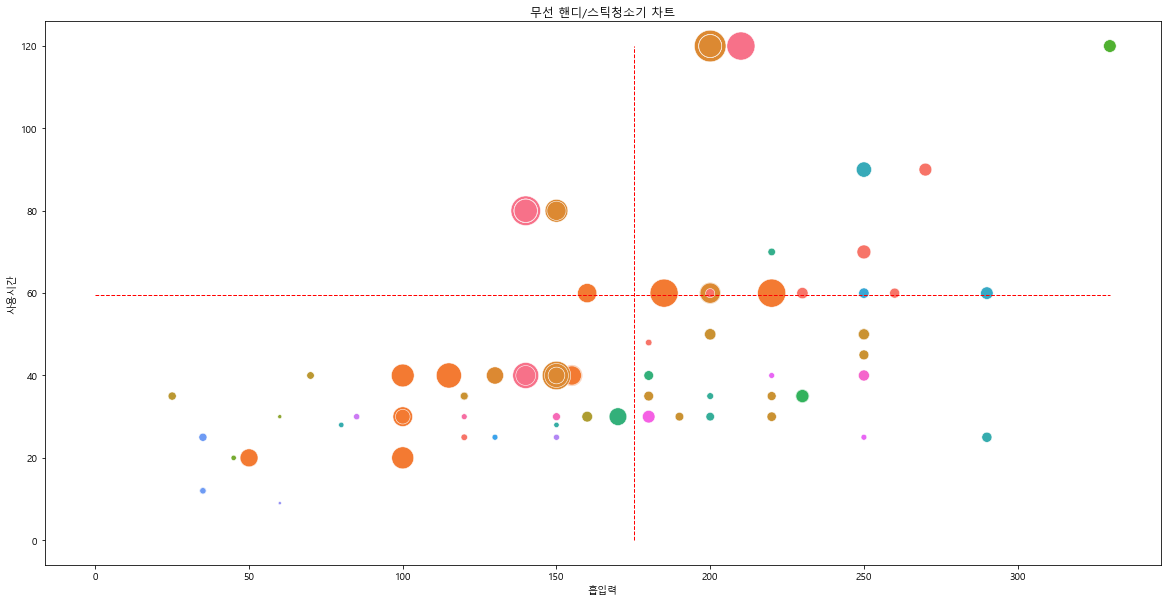

In [100]:
plt.figure(figsize=(20, 10))
plt.title("무선 핸디/스틱청소기 차트")
sns.scatterplot(x = '흡입력', y = '사용시간', size = '가격', hue = chart_data['회사명'], 
             data = chart_data, sizes = (10, 1000), legend = False)

plt.plot([0, suction_max_value], 
          [use_time_mean_value, use_time_mean_value], 
          'r--', 
          lw = 1 )

plt.plot([suction_mean_value, suction_mean_value], 
          [0, use_time_max_value], 
          'r--', 
          lw = 1 )


plt.show()

In [102]:
chart_data_selected = chart_data[:20]
len(chart_data_selected)

20

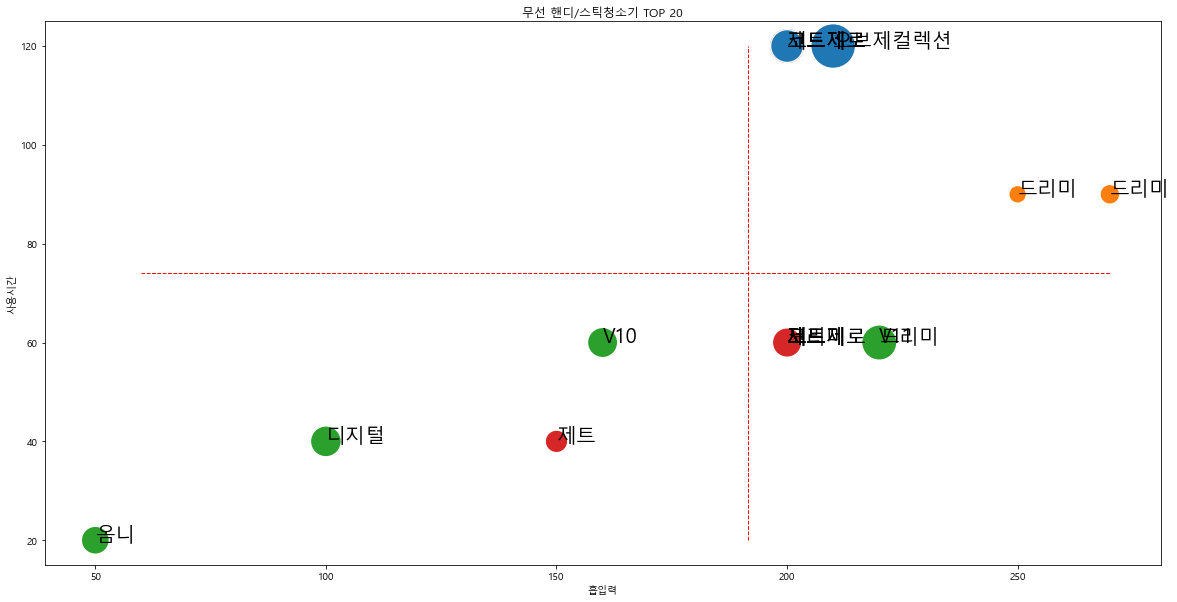

In [103]:
suction_max_value = chart_data_selected['흡입력'].max()
suction_mean_value = chart_data_selected['흡입력'].mean()
use_time_max_value = chart_data_selected['사용시간'].max()
use_time_mean_value = chart_data_selected['사용시간'].mean()

plt.figure(figsize=(20, 10))
plt.title("무선 핸디/스틱청소기 TOP 20")
sns.scatterplot(x = '흡입력', 
                  y = '사용시간', 
                  size = '가격', 
                  hue = chart_data_selected['회사명'], 
                  data = chart_data_selected, sizes = (100, 2000),
                  legend = False)

plt.plot([60, suction_max_value], 
          [use_time_mean_value, use_time_mean_value], 
          'r--', 
          lw = 1 )

plt.plot([suction_mean_value, suction_mean_value], 
          [20, use_time_max_value], 
          'r--', 
          lw = 1 )


for index, row in chart_data_selected.iterrows():
    x = row['흡입력']
    y = row['사용시간']
    s = row['제품'].split(' ')[0]
    plt.text(x, y, s, size=20)
    
    
plt.show()